<a href="https://colab.research.google.com/github/Alfonso-Garibay/computer-vision-course-Equipo-15/blob/main/5_frequency_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Team # 15**

* Manuel Alemán Cueto A01794894
* Emmanuel Domínguez Bravo A01793683
* Alfonso Garibay Flores A01224167
* Zmaltzin Paola Godinez Juárez A01794538
* Luis Angel Hermenegildo Dominguez A01793625

# 5. Frequency Domain

## Table of Contents
1. [Libraries](#libraries)
2. [Fast Fourier Transform (FFT)](#fft)
3. [Low Pass Filter](#low)
4. [High Pass Filter](#high)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp
from scipy import signal

## Fast Fourier Transform (FFT) <a class="anchor" id="fft" ></a>

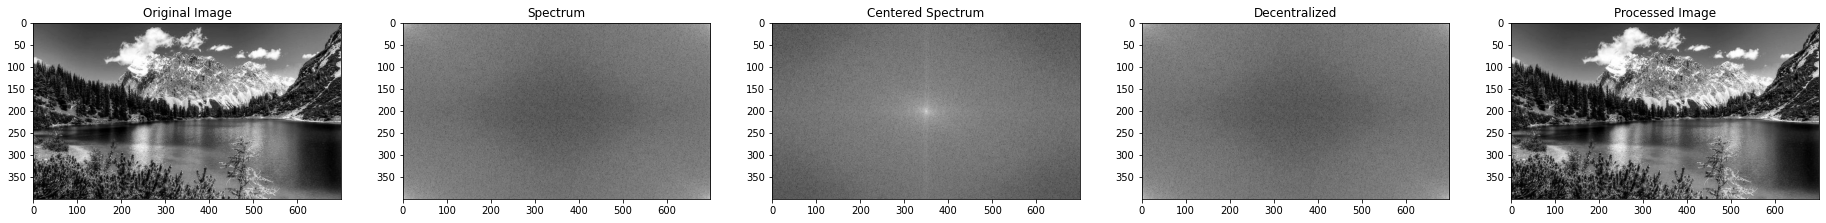

In [2]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/image.jpg", 0)
plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)), "gray"), plt.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img), "gray"), plt.title("Processed Image")

plt.show()

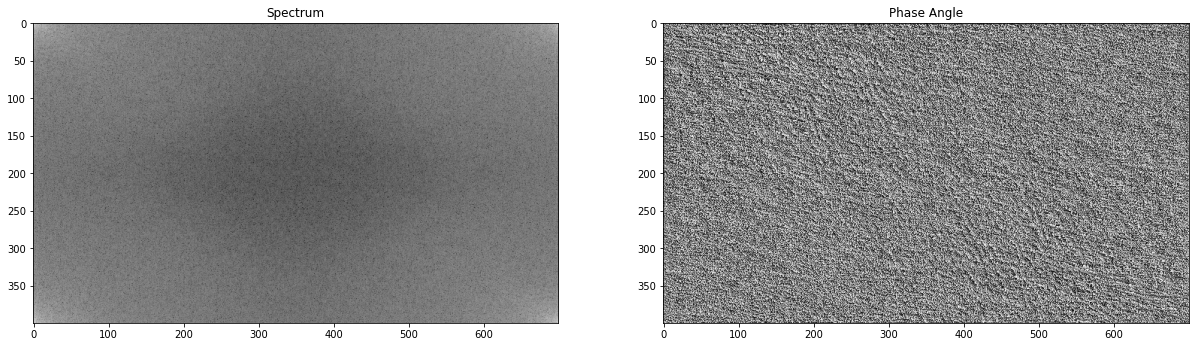

In [3]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/image.jpg", 0)

original = np.fft.fft2(img)
plt.subplot(131), plt.imshow(np.log(np.abs(original)), "gray"), plt.title("Spectrum")

plt.subplot(132), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle")
plt.show()

In [4]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

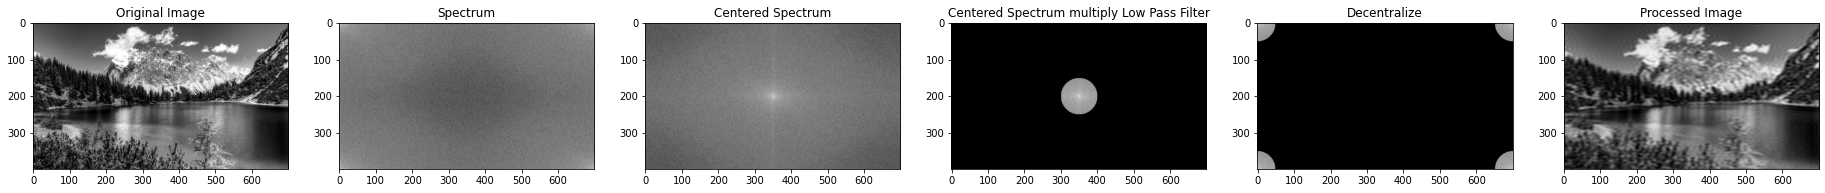

In [5]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/image.jpg", 0)
plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

## Low Pass Filter <a class="anchor" id="low" ></a>

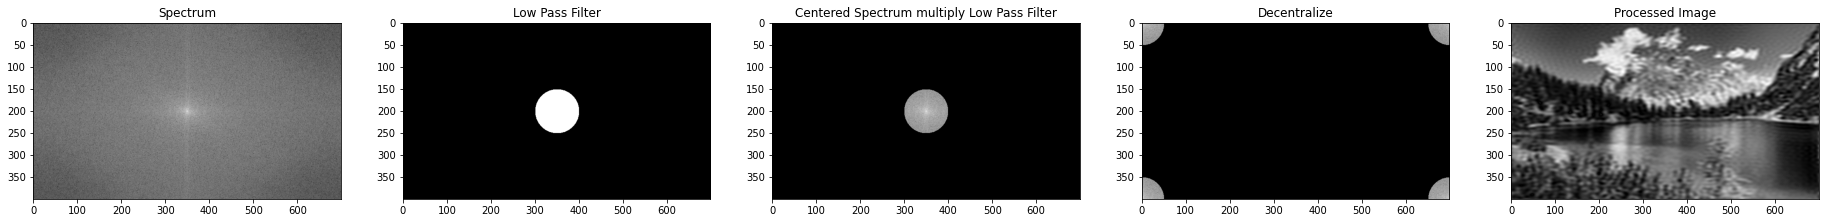

In [6]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = idealFilterLP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

## High Pass Filter <a class="anchor" id="high" ></a>

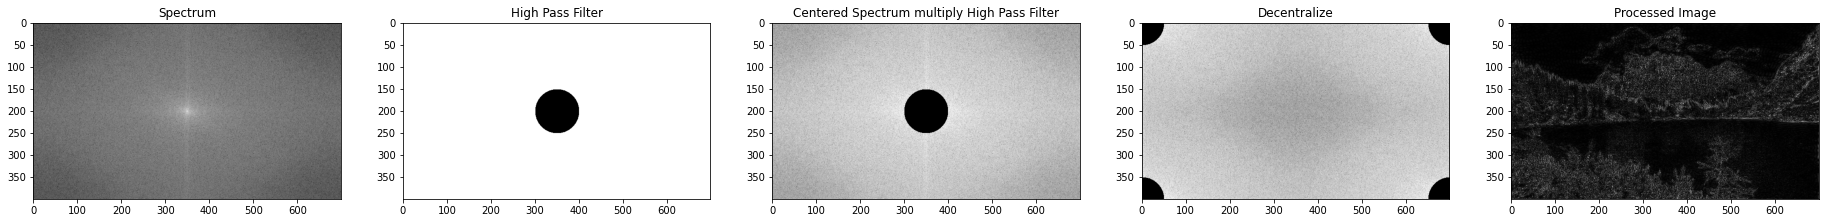

In [7]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

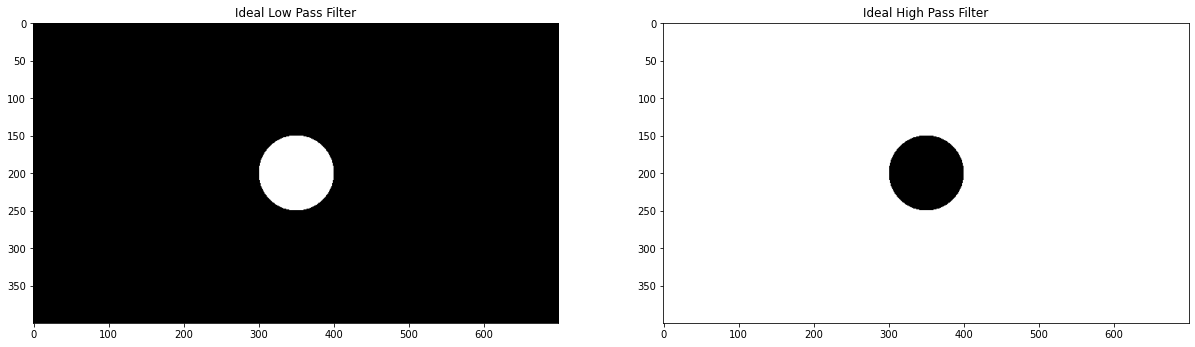

In [8]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Ideal Low Pass Filter")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Ideal High Pass Filter")

plt.show()

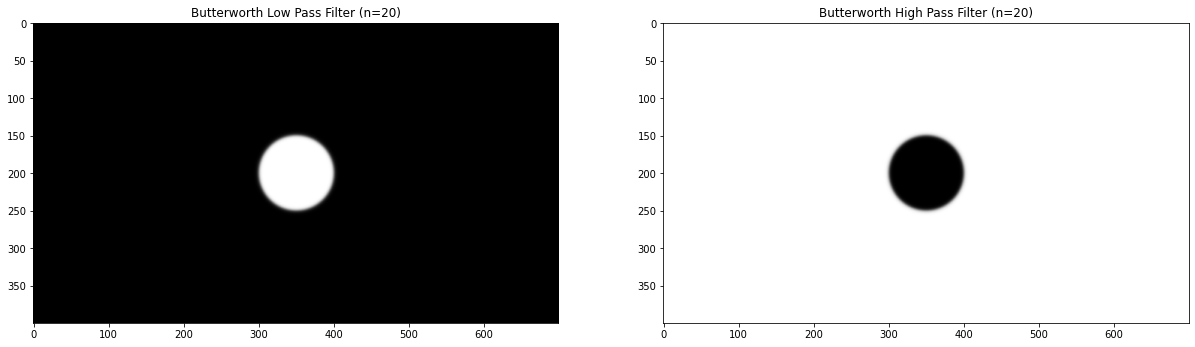

In [9]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50,img.shape,20)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=20)")

HighPass = butterworthHP(50,img.shape,20)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=20)")

plt.show()

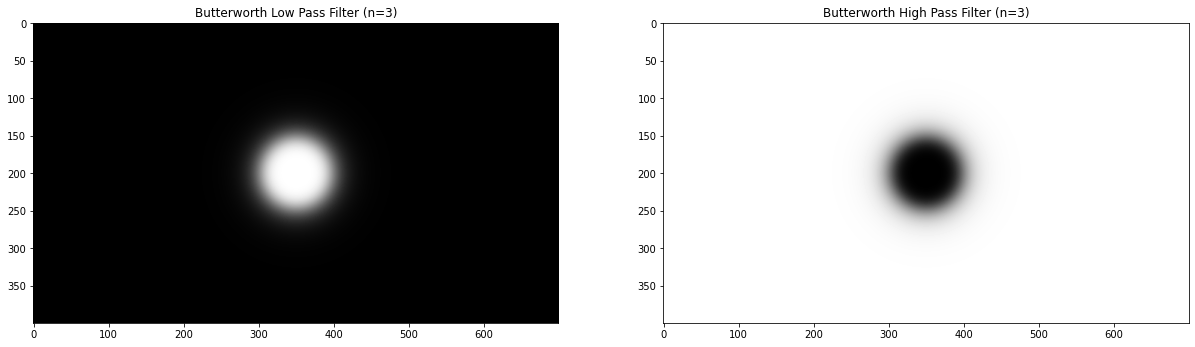

In [10]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50,img.shape,3)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=3)")

HighPass = butterworthHP(50,img.shape,3)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=3)")

plt.show()

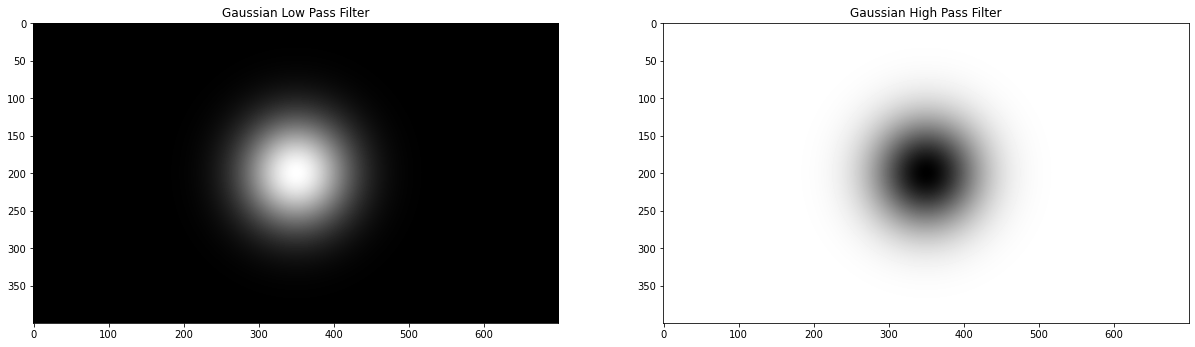

In [11]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = gaussianLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Gaussian Low Pass Filter")

HighPass = gaussianHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

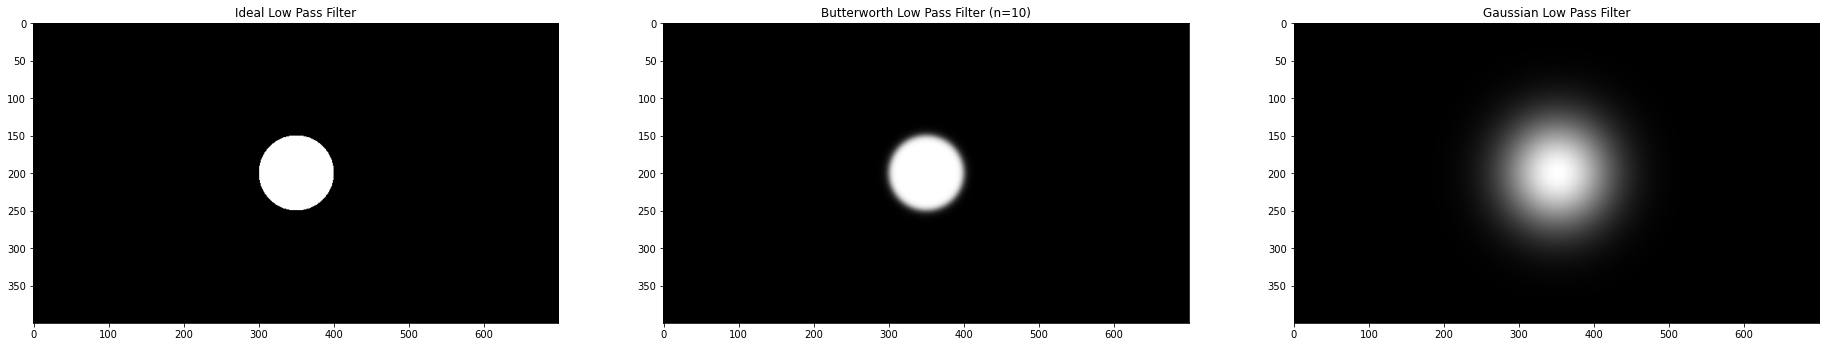

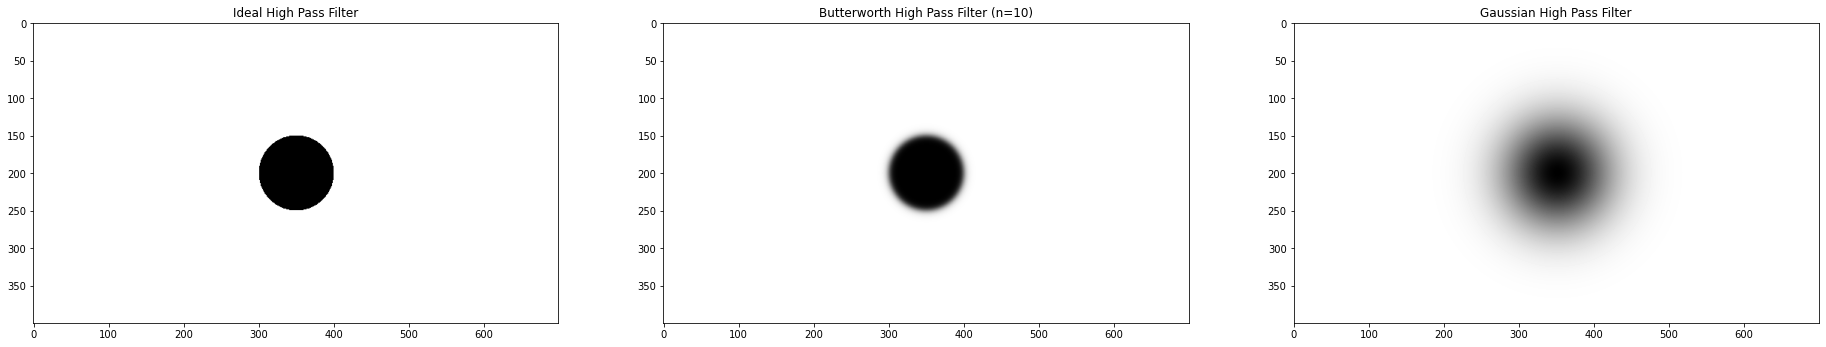

In [12]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

IdealLP = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(IdealLP, "gray"), plt.title("Ideal Low Pass Filter")

ButterLP = butterworthLP(50,img.shape,10)
plt.subplot(132), plt.imshow(ButterLP, "gray"), plt.title("Butterworth Low Pass Filter (n=10)")

GaussianLP = gaussianLP(50,img.shape)
plt.subplot(133), plt.imshow(GaussianLP, "gray"), plt.title("Gaussian Low Pass Filter")

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
IdealHP = idealFilterHP(50,img.shape)
plt.subplot(231), plt.imshow(IdealHP, "gray"), plt.title("Ideal High Pass Filter")

ButterHP = butterworthHP(50,img.shape,10)
plt.subplot(232), plt.imshow(ButterHP, "gray"), plt.title("Butterworth High Pass Filter (n=10)")

GaussianHP = gaussianHP(50,img.shape)
plt.subplot(233), plt.imshow(GaussianHP, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

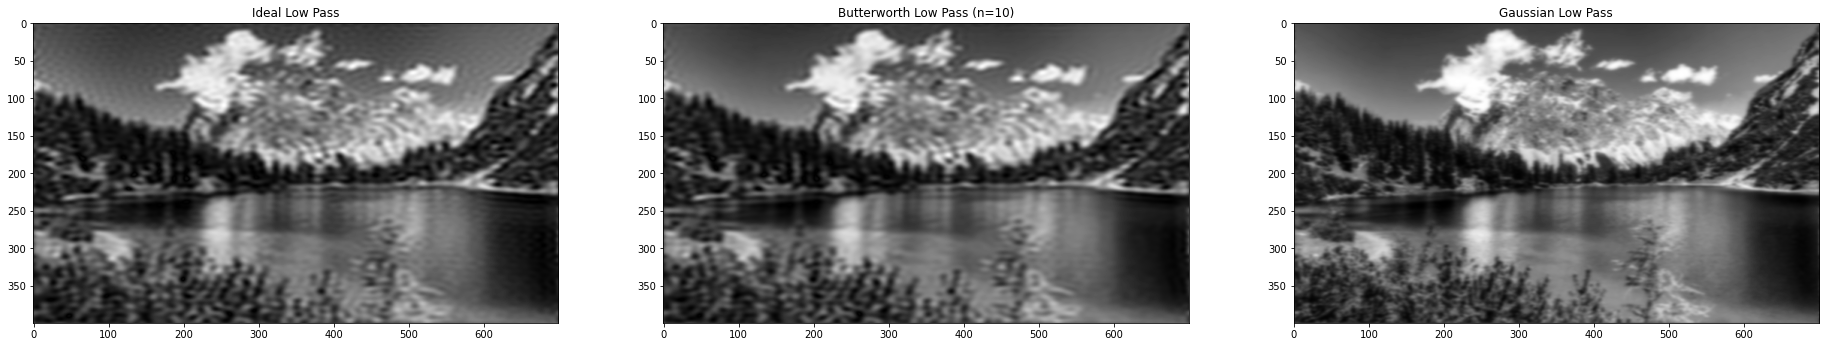

In [13]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(131), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Ideal Low Pass")

LowPassCenter = center * butterworthLP(50,img.shape,10)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (n=10)")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

plt.show()

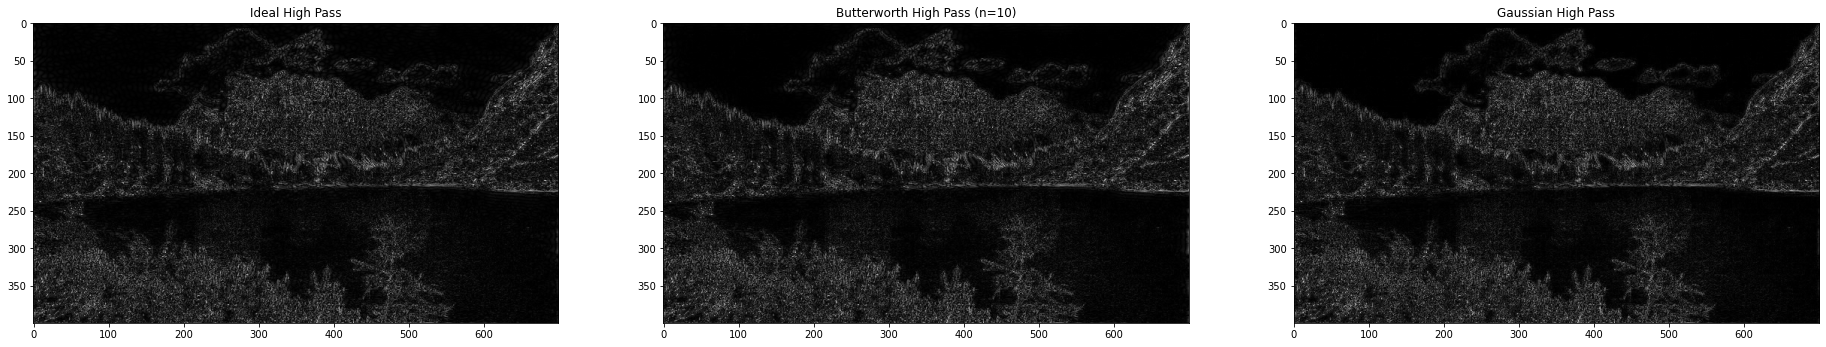

In [16]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(131), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ideal High Pass")

HighPassCenter = center * butterworthHP(50,img.shape,10)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (n=10)")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

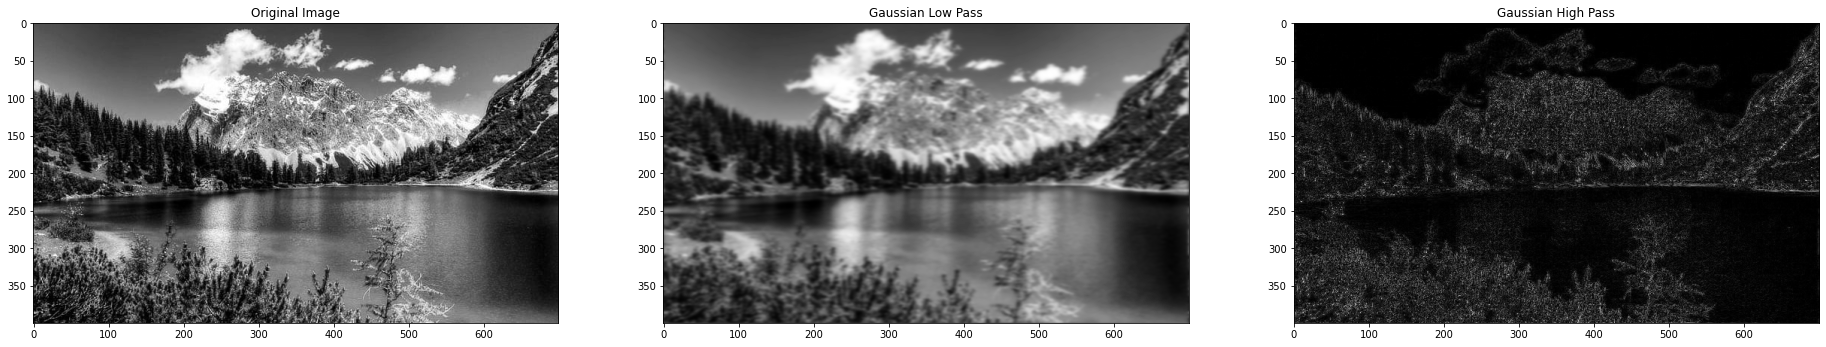

In [37]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

# **a) Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasabajas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,)**

### Filtro Ideal Pasa bajas (Low Pass)

EL filtro Ideal es un tipo de filtro utilizado en procesamiento de señales y procesamiento de imágenes para suavizar o eliminar las componentes de alta frecuencia de una señal o imagen, mientras que permite el paso de las componentes de baja frecuencia.
En el dominio de la frecuencia, el filtro pasa bajas se implementa mediante una máscara que deja pasar las frecuencias bajas (por debajo de la frecuencia de corte) y bloquea las frecuencias altas. Idealmente, este filtro debería tener una transición brusca entre las frecuencias que deja pasar y las que atenúa, pero en la práctica, los filtros reales suelen tener una transición suave para evitar efectos no deseados.

Un filtro de paso bajo ideal elimina por completo todas las frecuencias por encima de la frecuencia de corte y deja pasar las que están por debajo sin cambios; su respuesta de frecuencia es una función rectangular y es un filtro de pared de ladrillos . La región de transición presente en los filtros prácticos no existe en un filtro ideal. Un filtro de paso bajo ideal se puede realizar matemáticamente (teóricamente) multiplicando una señal por la función rectangular en el dominio de la frecuencia o, de manera equivalente, convolución con su respuesta de impulso , una función sinc , en el dominio del tiempo. (Mark Owen, 2007)

Algunas de las aplicaciones del filtros son en el sonido para eliminar ruidos de alta frecuencia o para suavizar transiciones bruscas en el sonido. En sistemas de comunicaciones, puede usarse para eliminar el ruido de alta frecuencia que podría interferir con la señal de interés. Para filtrar señales de control en sistemas de alimentación eléctrica y evitar oscilaciones no deseadas. En aplicaciones de procesamiento de imágenes, puede usarse para suavizar bordes y eliminar detalles finos no deseados.

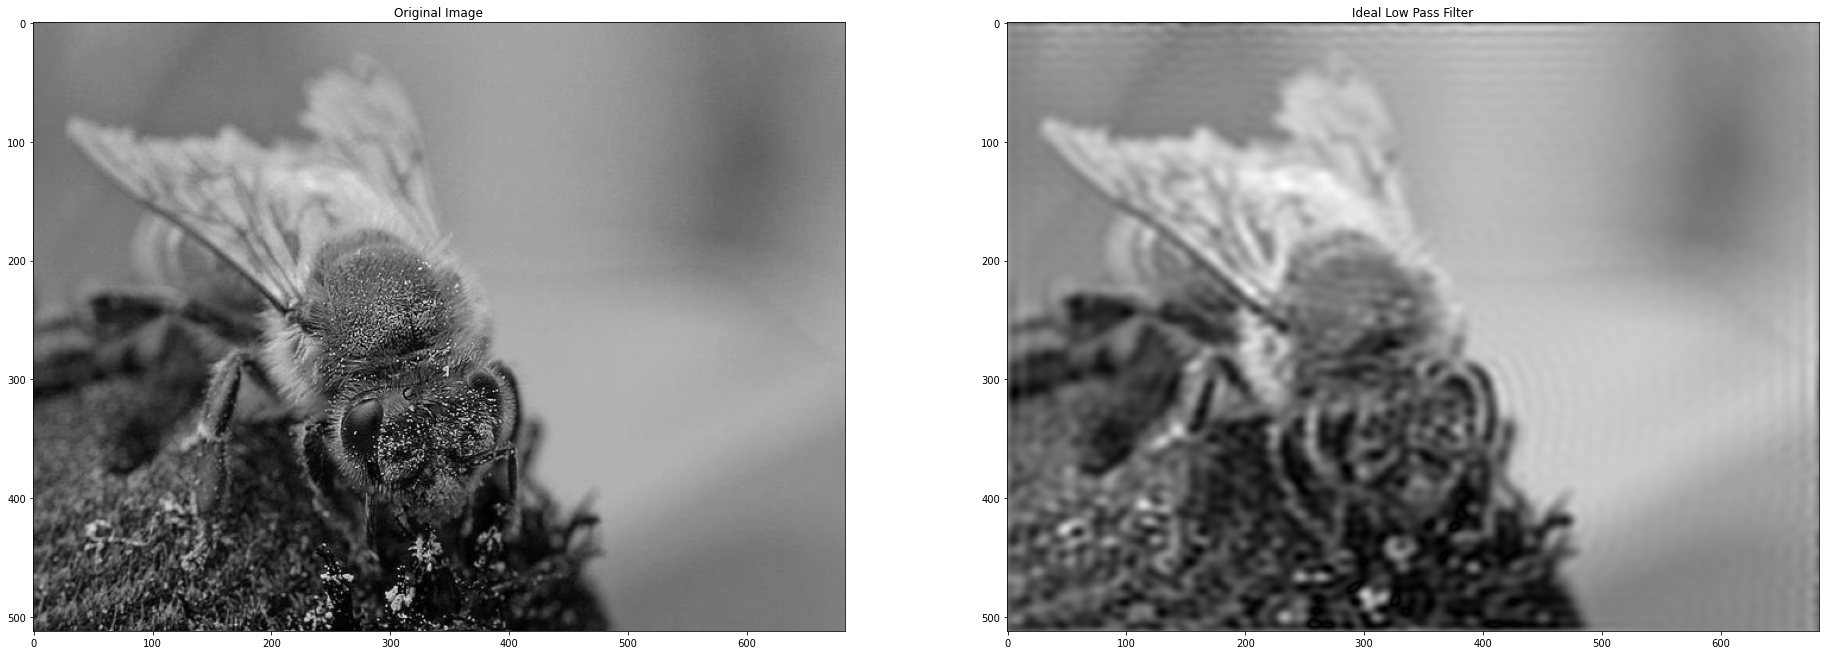

In [47]:
img = cv2.imread("data/bee.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

# Ideal Low Pass Filter
def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

# Aplicar Filtro Ideal Low Pass
LowPassCenterIdeal = center * idealFilterLP(50, img.shape)
LowPassIdeal = np.fft.ifftshift(LowPassCenterIdeal)
inverseLowPassIdeal = np.fft.ifft2(LowPassIdeal)

# Mostrar Imagen Original y después del filtro con Ideal Low Pass
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(121), plt.imshow(img, "gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(np.abs(inverseLowPassIdeal), "gray"), plt.title("Ideal Low Pass Filter")
plt.show()


# **b) Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasa altas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,)**

### Filtro Butterworth Pasa altas (High Pass)
El filtro pasa alta Butterworth es una herramienta fundamental en el procesamiento de imágenes y señales que se emplea para resaltar componentes de alta frecuencia mientras atenúa las de baja frecuencia. A diferencia de otros filtros pasa altas, este filtro se caracteriza por su respuesta de amplitud suave y monotónica, lo que significa que la transición entre las frecuencias atenuadas y las resaltadas es gradual (Gonzalez and Woods, 2018). Este comportamiento controlado por el parámetro de orden del filtro permite una flexibilidad ajustable en términos de la pendiente de la curva de transición, lo que facilita adaptar el filtro a diversas aplicaciones.

Al aplicar el filtro pasa alta Butterworth, se logra un realce de los detalles finos y bordes en la imagen, siendo especialmente útil en situaciones donde es crucial preservar la información de alta frecuencia. Este tipo de filtro encuentra aplicaciones en campos como el procesamiento de imágenes médicas, análisis de texturas y mejora de la definición de contornos en imágenes, contribuyendo a la extracción efectiva de características relevantes en entornos visuales.

In [2]:
# Butterworth Filter notebook reference
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base


# Butterworth filter second application
def butterworthHP2(img, cutoff_freq, filter_type, order=1):
    rows, cols = img.shape
    center = (rows // 2, cols // 2)
    butter_filter = np.ones((rows, cols))
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            if filter_type == 'lowpass':
                butter_filter[i, j] = 1 / (1 + (distance / cutoff_freq)**(2 * order))
            elif filter_type == 'highpass':
                butter_filter[i, j] = 1 / (1 + (cutoff_freq / distance)**(2 * order))
    return butter_filter

<ipython-input-2-dbd1e8afd08f>:26: RuntimeWarning: divide by zero encountered in double_scalars
  butter_filter[i, j] = 1 / (1 + (cutoff_freq / distance)**(2 * order))


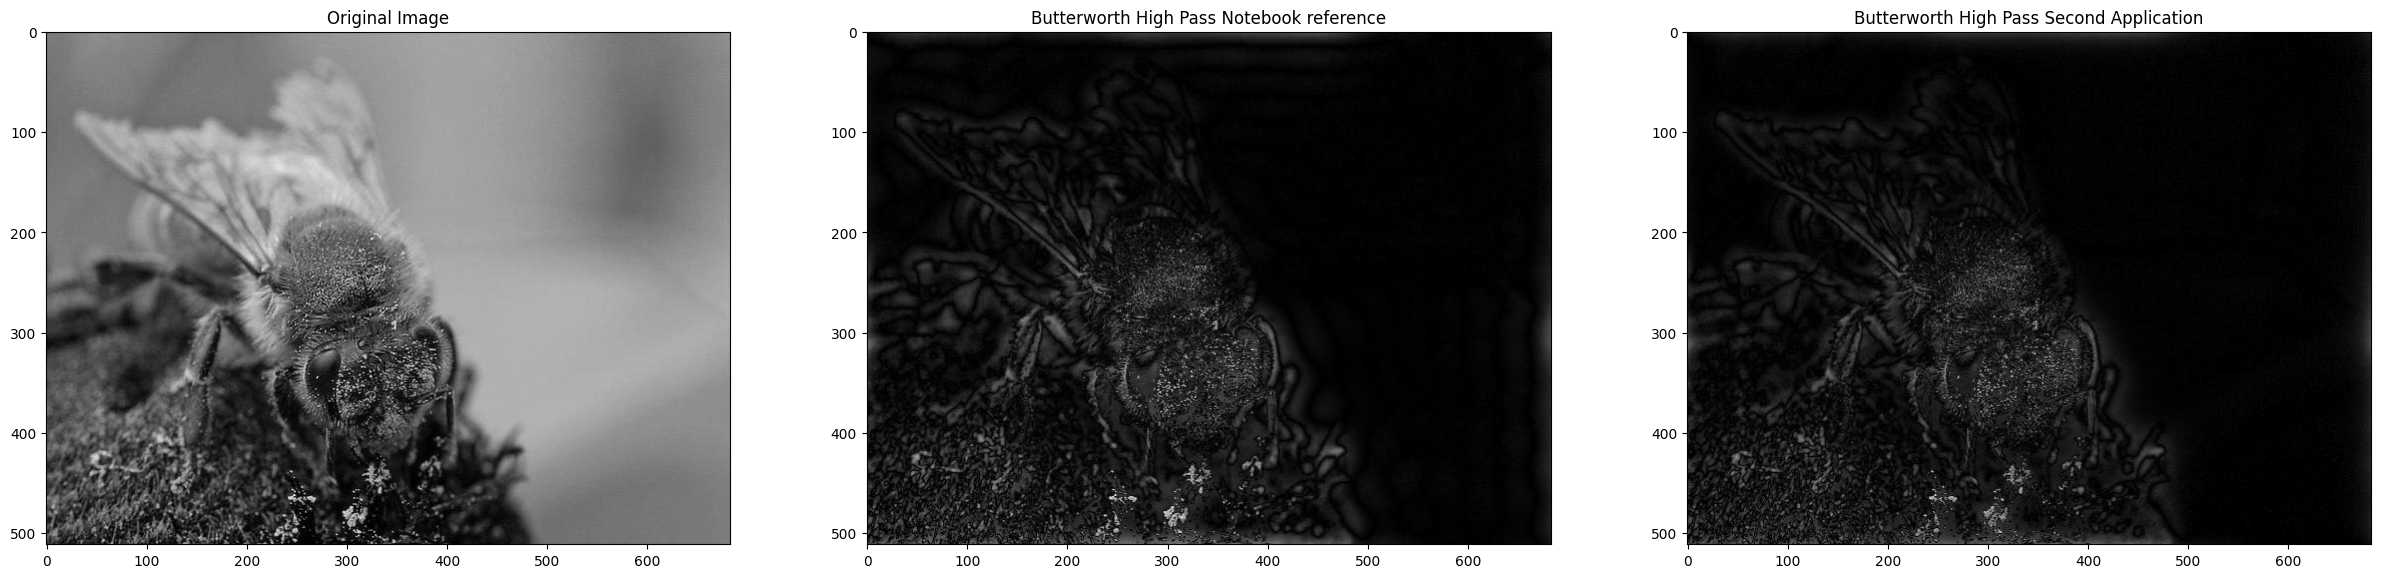

In [3]:
# Filtro Butterworth HP
img = cv2.imread("/content/bee.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

# Butterworth HP notebook reference
HighPassCenter = center * butterworthHP(10,img.shape,12)
HighPass = np.fft.ifftshift(HighPassCenter)
inverseHighPassB = np.fft.ifft2(HighPass)

# Butterworth HP second application
hp_filter = butterworthHP2(img, cutoff_freq=10, filter_type='highpass')
inverseHighPassB2 = np.fft.ifft2(np.fft.fft2(img) * np.fft.fftshift(hp_filter)).real

# Mostrar la imagen original y las imagenes filtradas con las dos aplicaciones
plt.figure(figsize=(30, 20), constrained_layout=False)
plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")
plt.subplot(132), plt.imshow(np.abs(inverseHighPassB), "gray"), plt.title("Butterworth High Pass Notebook reference")
plt.subplot(133), plt.imshow(np.abs(inverseHighPassB2), "gray"), plt.title("Butterworth High Pass Second Application")
plt.show()

### Filtro Gaussiano Pasa Altas (High Pass)
El filtro pasa altas gaussiano es una técnica de procesamiento de imágenes que se utiliza para resaltar las características de alta frecuencia en una imagen. Este filtro combina las propiedades de suavizado inherentes a la función gaussiana con la capacidad de realce de bordes propia de los filtros pasa altas. La desviación estándar (σ) del filtro gaussiano controla la cantidad de suavizado, y al ajustar este parámetro, es posible modular el equilibrio entre realce de detalles finos y reducción de ruido.

Al aplicar el filtro pasa altas gaussiano, las regiones de la imagen con cambios rápidos o bordes notorios experimentan una mayor respuesta, lo que resulta en una imagen final que destaca los detalles estructurales importantes. Este tipo de filtro es ampliamente utilizado en diversas aplicaciones, como la mejora de imágenes para análisis de contornos, detección de bordes y preprocesamiento en tareas de visión por computadora.

In [4]:
# Gaussian Filter notebook reference
def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

# Gaussian filter second application
def gaussianHP2(img, sigma, filter_type):
    rows, cols = img.shape
    center = (rows // 2, cols // 2)
    gaussian_filter = np.ones((rows, cols))
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            if filter_type == 'lowpass':
              gaussian_filter[i, j] = np.exp(-(distance**2) / (2 * (sigma**2)))
            elif filter_type == 'highpass':
              gaussian_filter[i, j] = 1 - np.exp(-(distance**2) / (2 * (sigma**2)))
    return gaussian_filter

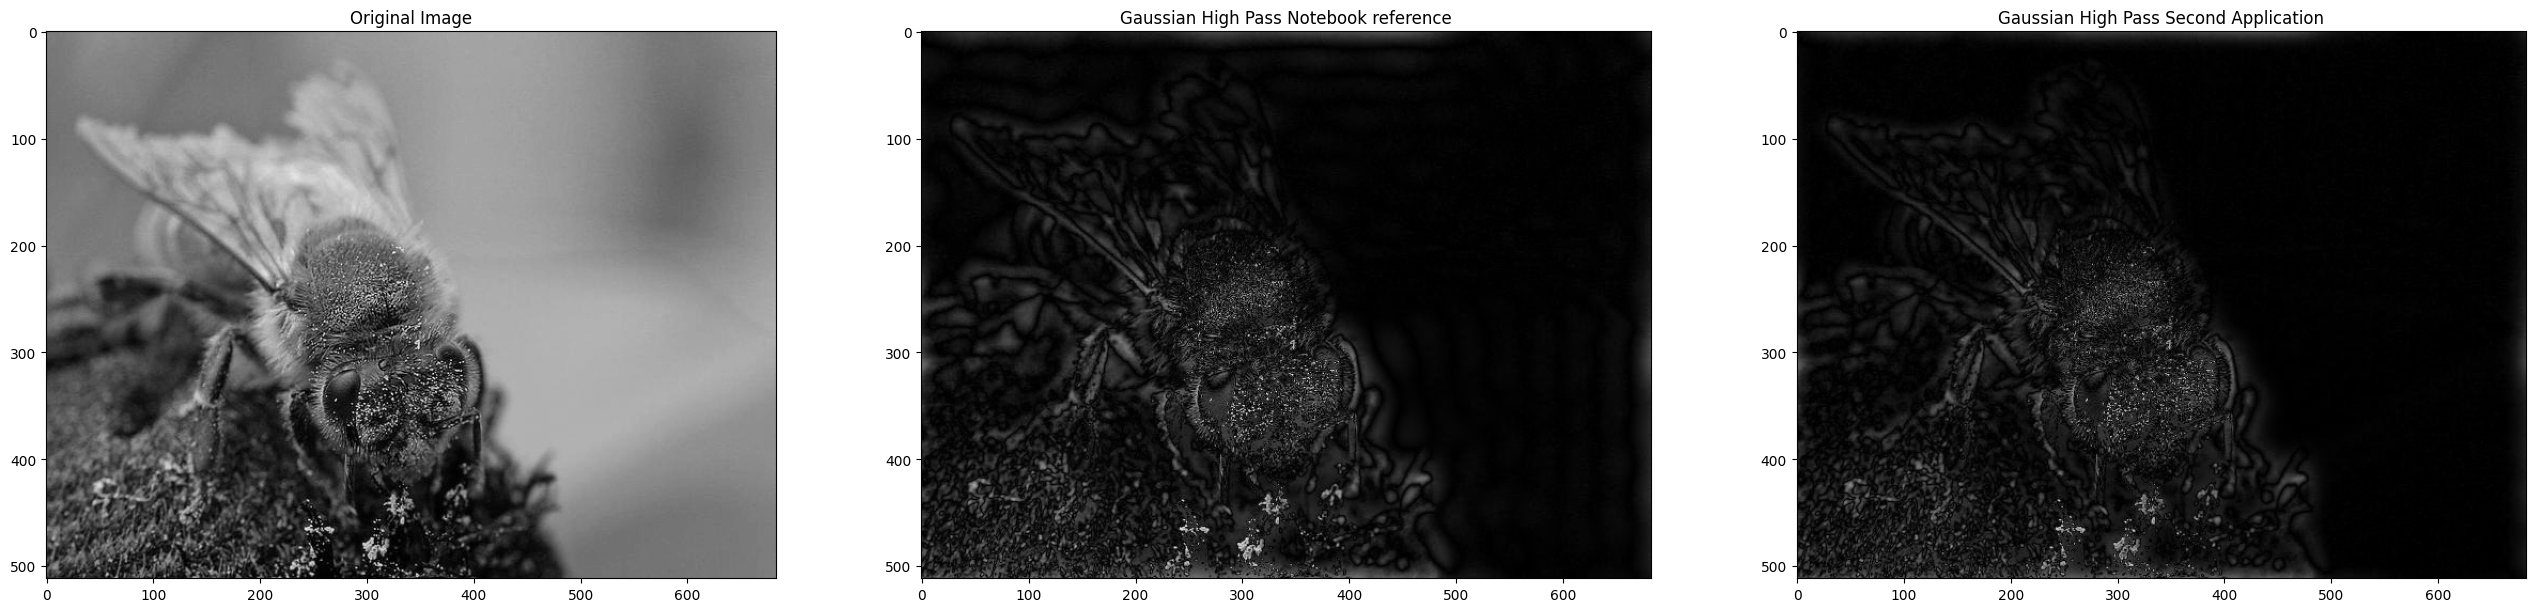

In [11]:
# Gaussian HP notebook reference
HigPassCenter = center * gaussianHP(10,img.shape)
HighPassG = np.fft.ifftshift(HighPassCenter)
inverseHighPassG = np.fft.ifft2(HighPassG)

# Aplicar filtro Gaussiano pasa altas
highpass_filter = gaussianHP2(img, sigma=10, filter_type='highpass')
inverseHighPassG2 = np.fft.ifft2(np.fft.fft2(img) * np.fft.fftshift(highpass_filter)).real

# Mostrar imagen original y después del filtro Gaussiano pasa bajas y pasa altas
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")
plt.subplot(132), plt.imshow(np.abs(inverseHighPassG), "gray"), plt.title("Gaussian High Pass Notebook reference")
plt.subplot(133), plt.imshow(np.abs(inverseHighPassG2), "gray"), plt.title("Gaussian High Pass Second Application")
plt.show()

### Filtro Ideal Pasa Altas (High Pass)


El filtro pasa alta ideal es una herramienta esencial en el procesamiento de imágenes y señales que se utiliza para resaltar componentes de alta frecuencia mientras atenúa las de baja frecuencia. A diferencia de otros filtros pasa altas, como el filtro pasa alta Gaussiano que utiliza una función Gaussiana para el suavizado, el filtro pasa alta ideal se basa en un concepto idealizado donde se eliminan las componentes de baja frecuencia de manera abrupta y nítida.

Este filtro ofrece una respuesta de amplitud ideal, lo que significa que la transición entre las frecuencias atenuadas y las resaltadas es instantánea, sin ningún tipo de suavizado o modulación. La efectividad del filtro pasa alta ideal radica en su capacidad para resaltar los bordes y detalles finos de la imagen de forma precisa y sin introducir distorsiones no deseadas.

Al aplicar el filtro pasa alta ideal, se logra un realce notable de los detalles finos y bordes en la imagen, siendo especialmente útil en situaciones donde es crucial preservar la información de alta frecuencia. Este tipo de filtro encuentra aplicaciones en campos como el procesamiento de imágenes médicas, análisis de texturas y mejora de la definición de contornos en imágenes, contribuyendo a la extracción efectiva de características relevantes en entornos visuales.

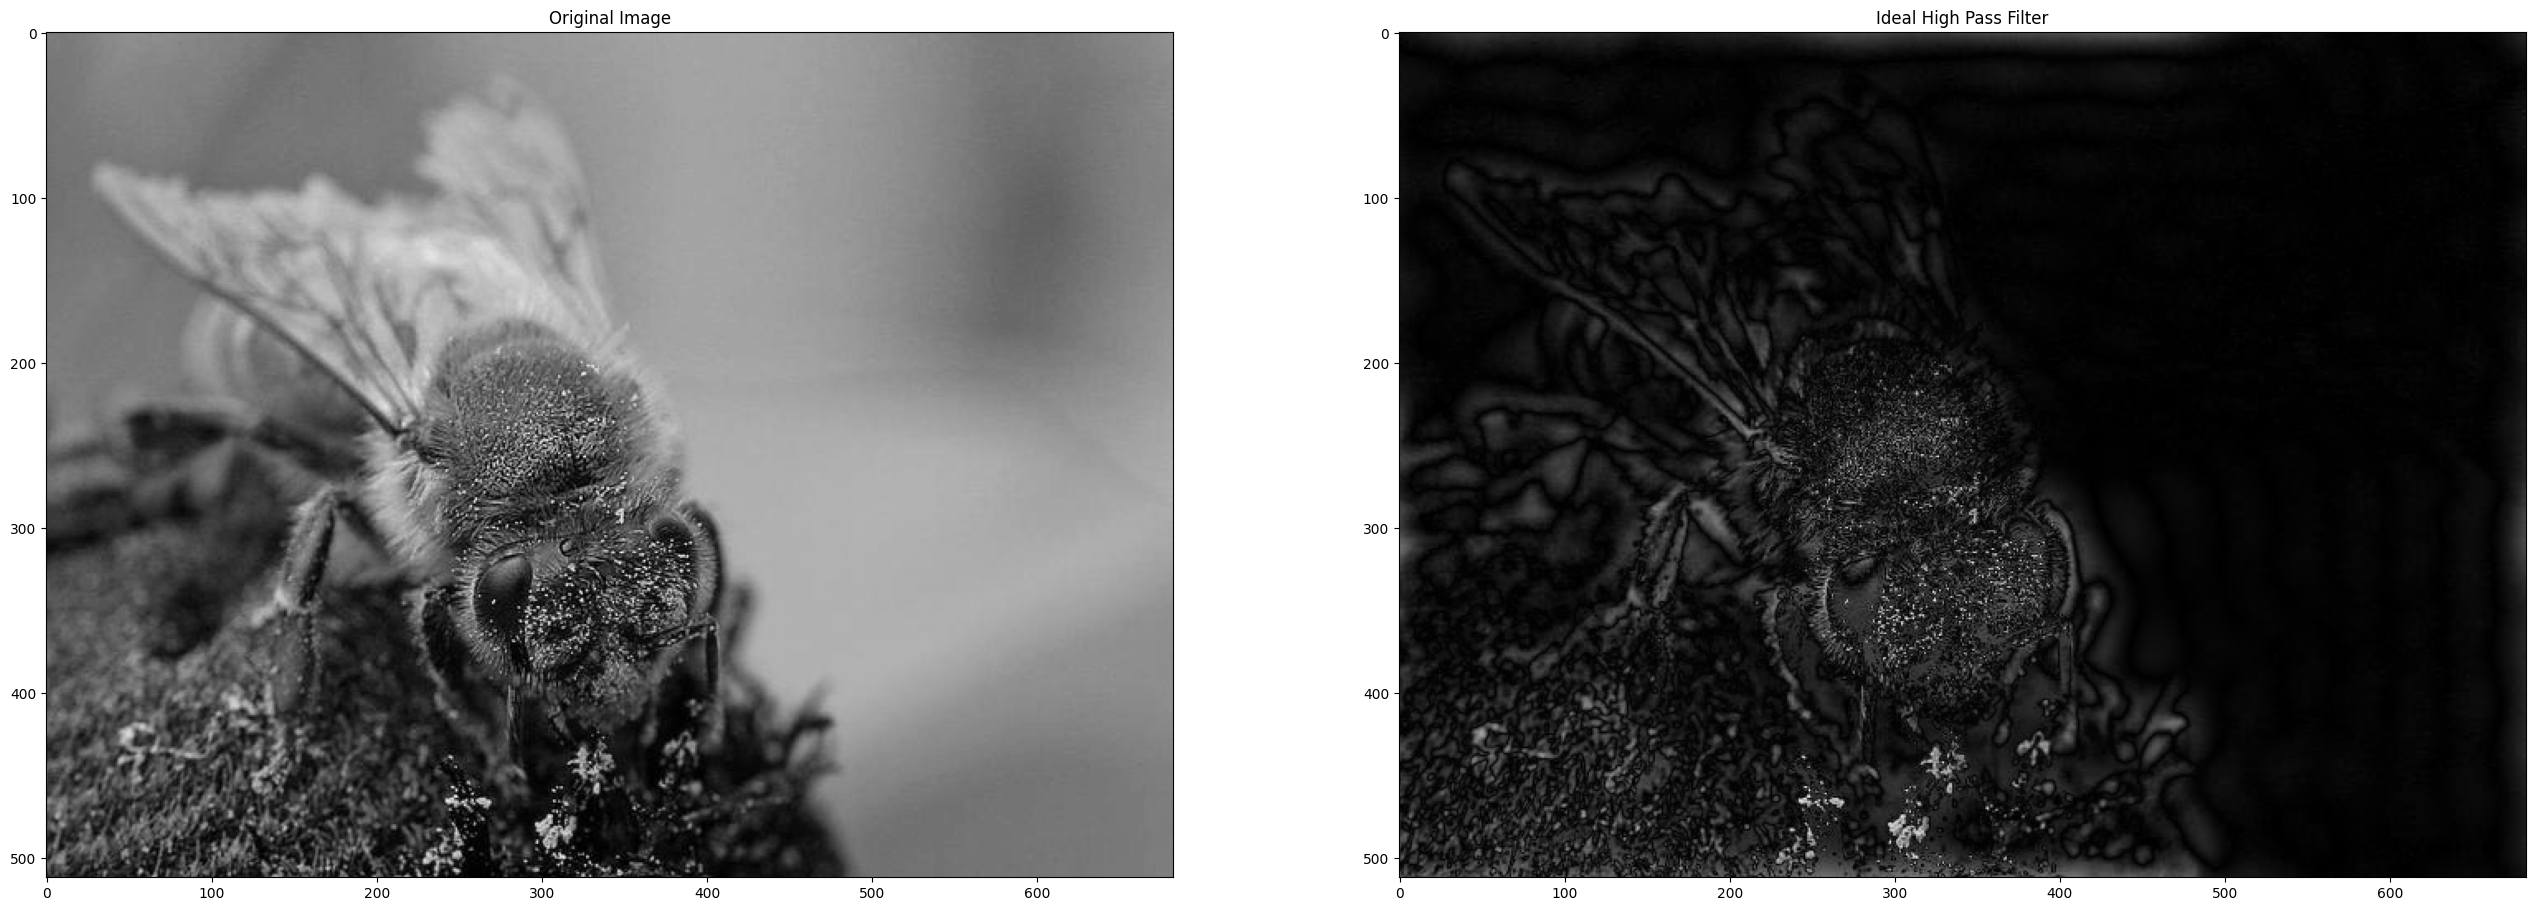

In [10]:
# Ideal High Pass Filter
def idealFilterHP(D0, imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x), center) < D0:
                base[y,x] = 0
    return base

# Aplicar Filtro Ideal High Pass
HighPassCenterIdeal = center * idealFilterHP(10, img.shape)
HighPassIdeal = np.fft.ifftshift(HighPassCenterIdeal)
inverseHighPassIdeal = np.fft.ifft2(HighPassIdeal)

# Mostrar Imagen Original y después del filtro con Ideal High Pass
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(121), plt.imshow(img, "gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(np.abs(inverseHighPassIdeal), "gray"), plt.title("Ideal High Pass Filter")
plt.show()


#### Bibliografía
* Gonzalez, R. & Woods, R. (2018). Digital Image Processing.  4° Edition. Pearson.
* Mark Owen (2007). Procesamiento práctico de señales . Prensa de la Universidad de Cambridge. pag. 81.ISBN _ 978-0-521-85478-8.